In [196]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
#make the noteputs output stable
np.random.seed(42)


#to plot
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#loading the data
daten_full = pd.read_csv("wdbc.csv")


#formatting the data-------------------------------------------------------------------------------------------------------------------------------

#removing the 'ID' Column
daten = daten_full.drop('ID',1)

#splitting the dataset into training and test set
train_set,test_set=train_test_split(daten,test_size=0.2)

#splitting the training set into data and labels
x_train = train_set.drop('Label',1)
y_train = LabelBinarizer().fit_transform(train_set['Label'].values.reshape(-1,1))
#scaling the train_set data
x_train_prepared = MinMaxScaler().fit_transform(x_train)

#splitting the test set into data and labels
x_test = test_set.drop('Label',1)
y_test = LabelBinarizer().fit_transform(test_set['Label'].values.reshape(-1,1))
#scaling the test_set data
x_test_prepared = MinMaxScaler().fit_transform(x_test)

#preparing the test and training and data for binary classification
y_train_1  = (y_train == 1)
y_train_prepared = y_train_1.ravel()
y_test_1 = (y_test == 1)
y_test_prepared = y_test_1.ravel()


#to test the various models and classification--------------------------------------------------------------------------------------------------------
model_data = daten.drop('Label',1)
model_data_2 = MinMaxScaler().fit_transform(model_data)
some_data = model_data_2[:5]
model_label = LabelBinarizer().fit_transform(daten['Label'].values.reshape(-1,1))
some_label = model_label[:5]

In [164]:
#linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared,y_train)
y_lin_reg_pred = lin_reg.predict(x_test_prepared)

#evaluating the model
accuracy_lin_reg = accuracy_score(y_test,y_lin_reg_pred.round(),normalize=True)
print(accuracy_lin_reg)

0.842105263158


In [167]:
#decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(x_train_prepared,y_train)
y_tree_reg_pred = tree_reg.predict(x_test_prepared)

#evaluating the model
accuracy_tree_reg = accuracy_score(y_test,y_tree_reg_pred.round(),normalize=True)
print(accuracy_tree_reg)

0.842105263158


In [166]:
#support vector regression model
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train_prepared,y_train)
y_svm_reg_pred = svm_reg.predict(x_test_prepared)

#evaluating the model
accuracy_svm_reg = accuracy_score(y_test,y_svm_reg_pred.round(),normalize=True)
print(accuracy_svm_reg)

0.929824561404


C:\Users\Shitao Zeng\AppData\Local\conda\conda\envs\application1\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [147]:
#random forest regressor model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train_prepared,y_train)
y_forest_reg_pred = forest_reg.predict(x_test_prepared)

#evaluating the model
accuracy_forest_reg = accuracy_score(y_test,y_forest_reg_pred.round(),normalize=True)
print(accuracy_forest_reg)

0.929824561404


C:\Users\Shitao Zeng\AppData\Local\conda\conda\envs\application1\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


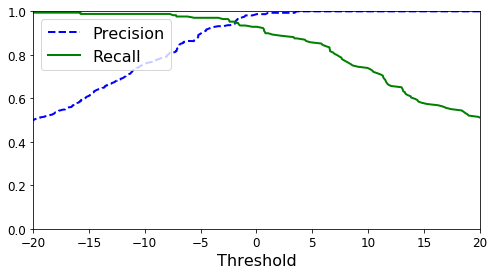

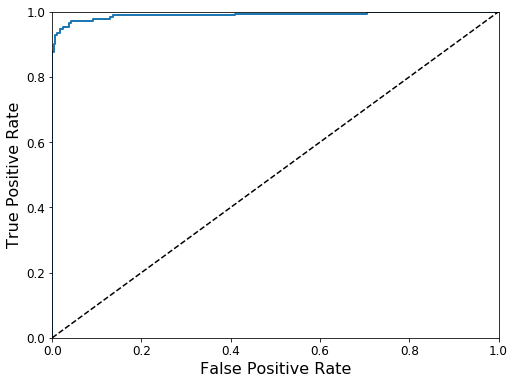

In [197]:
#SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_prepared,y_train_prepared)

#evalutating the classifier
cross_val_score(sgd_clf, x_train_prepared, y_train_prepared, cv=10, scoring="accuracy")
y_scores = cross_val_predict(sgd_clf, x_train_prepared, y_train_prepared, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_prepared, y_scores)

#plotting precision recall vs threshhold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-20, 20])
plt.show()

#plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_prepared, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()